In [1]:
from keras.models import load_model

model1 = load_model('noise_nonNoise.h5')

model2 = load_model('AON.h5')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.initializers import VarianceScaling
from keras.optimizers import Adam
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping
np.set_printoptions(suppress=True)

testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)

print(testData.shape)
print(testLabel.shape)

(3041, 9000, 1)
(3041, 4)


In [3]:
results = []
for i in testData:
    # 0: Non-noise 1: Noise
    i = i.reshape((1, testData.shape[1], 1))
    noise_or_nonNoise = model1.predict_classes(i, batch_size=1)
    
    if noise_or_nonNoise == 1:
        results.append(1)
    else:
        AON_result = model2.predict_classes(i, batch_size=1)
        
        if AON_result == 0:
            results.append(0)
        elif AON_result == 1:
            results.append(2)
        else:
            results.append(3)


In [4]:
results = np.array(results)
results.shape

(3041,)

In [4]:
from sklearn.metrics import accuracy_score

score = accuracy_score(testL, results)
print(score)

0.8339362051956594


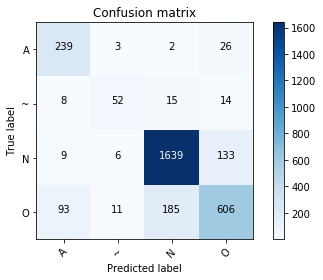

In [6]:
import itertools
import pylab as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(testL, results)
plot_confusion_matrix(cnf_matrix, classes=['A', '~', 'N', 'O'],
                      title='Confusion matrix')

In [8]:
from sklearn.metrics import f1_score
result = f1_score(testL, results, average=None)
result

array([0.77221325, 0.64596273, 0.90352811, 0.72401434])